<a href="https://colab.research.google.com/github/GaneshYadaw/Djnago-CURD-Operation-Studnet-Details/blob/project/image_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import ssl
import numpy as np

In [ ]:
from fuzzywuzzy import process

In [ ]:
reader = easyocr.Reader(['en','hi'])

In [ ]:
image_path = r"image_pic/adhar.jpg"
image = cv2.imread(image_path)

In [ ]:
coord,_ = reader.detect(image)

In [ ]:
coord

[[[117, 145, 99, 115],
  [157, 207, 99, 117],
  [113, 208, 115, 141],
  [117, 147, 143, 157],
  [147, 191, 137, 157],
  [205, 335, 137, 157],
  [115, 150, 164, 185],
  [169, 211, 163, 181],
  [115, 251, 221, 241],
  [82, 146, 262, 286],
  [164, 342, 260, 286]]]

In [ ]:
image_raw = image.copy()
for each_coord in coord[0]:
    x1,x2,y1,y2 = each_coord
    cv2.rectangle(image_raw,(x1,y1),(x2,y2),color=(225, 0, 0), thickness=2)    

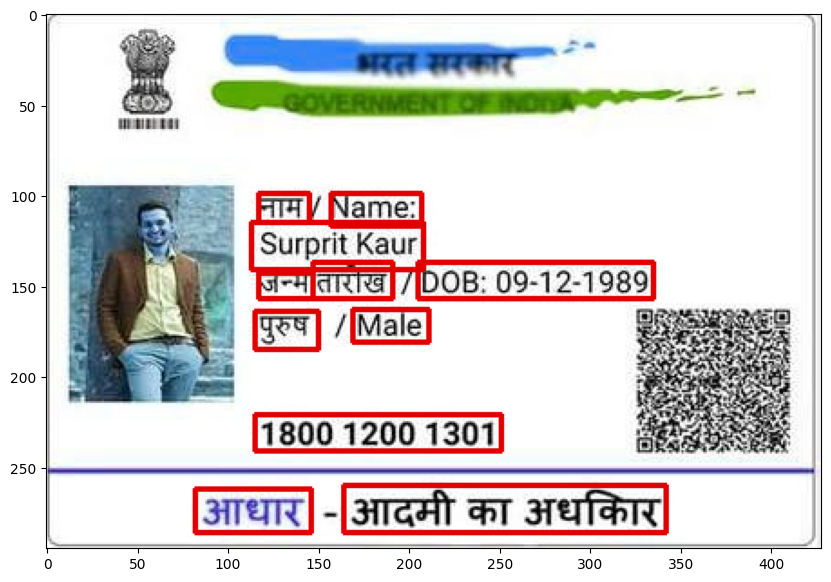

In [ ]:
plt.figure(figsize=(10,7))
plt.imshow(image_raw)

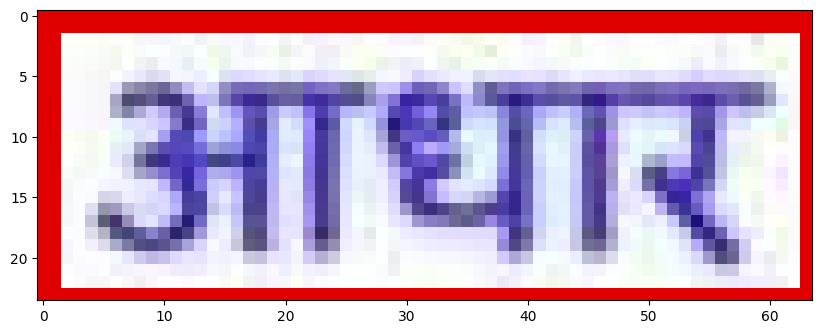

In [ ]:
crop_img = image_raw[262:286,82:146]  
plt.figure(figsize =(10,7))
plt.imshow(crop_img)

In [ ]:
result = reader.readtext(crop_img)
result

[([[3, 3], [61, 3], [61, 23], [3, 23]], 'आधार', 0.8769762242812358)]

In [ ]:
result[0][1]

'आधार'

In [ ]:
result[0][2]

0.8769762242812358

In [ ]:
extraction_dtls = pd.DataFrame()

In [ ]:
for each_coord in coord[0]:
    x1, x2, y1, y2 = each_coord
    crop = image[y1:y2, x1:x2]
    try:
          result =reader.readtext(crop)
          if result:
              extraction_dict = {}
              result  =result[0]
              text = result[1]
              conf = round(result[2],2)
              extraction_dict['Coordinate'] = each_coord
              extraction_dict['Text'] = text
              extraction_dict['Confidence'] = conf
              extraction_dtls = extraction_dtls.append(extraction_dict, ignore_index = True)
    except:
        pass

<ipython-input-133-cdf2dd876b52>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extraction_dtls = extraction_dtls.append(extraction_dict, ignore_index = True)
<ipython-input-133-cdf2dd876b52>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extraction_dtls = extraction_dtls.append(extraction_dict, ignore_index = True)
<ipython-input-133-cdf2dd876b52>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extraction_dtls = extraction_dtls.append(extraction_dict, ignore_index = True)
<ipython-input-133-cdf2dd876b52>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extraction_dtls = extraction_dtls.append(extraction_dict, ignore_index = Tr

In [ ]:
extraction_dtls

,Coordinate,Text,Confidence
0,"[117, 145, 99, 115]",नाम,0.93
1,"[157, 207, 99, 117]",Name:,0.34
2,"[113, 208, 115, 141]",Surprit Kaur,0.86
3,"[147, 191, 137, 157]",ताराख,0.64
4,"[205, 335, 137, 157]",00B: 09-12-1989,0.63
5,"[115, 150, 164, 185]",पुरुष,0.68
6,"[169, 211, 163, 181]",Male,0.51
7,"[115, 251, 221, 241]",1800 1200 1301,0.98
8,"[82, 146, 262, 286]",आधार,0.75
9,"[164, 342, 260, 286]",आदमी का अधकिार,0.56


In [ ]:
pan_card_corpus = ["PAN","Permanent Account number","Income Tax Department"]
adhar_corpus = ["aadhar","आधार"]
voter_id_corpus =["Election","Voter Id"]
passport_corpus =["Passport"]

In [ ]:
doc_type_corpus = {"PAN":pan_card_corpus, "Aadhar":adhar_corpus, "Voter Id":voter_id_corpus, "Passport":passport_corpus}
doc_type_corpus

{'PAN': ['PAN', 'Permanent Account number', 'Income Tax Department'],
 'Aadhar': ['aadhar', 'आधार'],
 'Voter Id': ['Election', 'Voter Id'],
 'Passport': ['Passport']}

In [ ]:
final_doc_type =""

In [ ]:
for doc_type, corpus in doc_type_corpus.items():
  for each_corpus in corpus:
    match = process.extractOne(each_corpus, extraction_dtls["Text"])
    # print(match)
    if match[1]>90:
      final_doc_type = doc_type
      break

In [ ]:
print(final_doc_type)

Aadhar


In [140]:
 pip freeze > requirements. txt